In [2]:
import numpy as np
import pandas as pd
import math

import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
%matplotlib inline

In [3]:
data=pd.read_csv('/Users/sunilhariharan/Downloads/data science/datasets/startup_funding.csv')

In [4]:
df=data

In [5]:
df.head(10)

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN
5,5,01/07/2017,Billion Loans,Consumer Internet,Peer to Peer Lending platform,Bangalore,Reliance Corporate Advisory Services Ltd,Seed Funding,"1,000,000",NaN
6,6,03/07/2017,Ecolibriumenergy,Technology,Energy management solutions provider,Ahmedabad,"Infuse Ventures, JLL",Private Equity,"2,600,000",NaN
7,7,04/07/2017,Droom,eCommerce,Online marketplace for automobiles,Gurgaon,"Asset Management (Asia) Ltd, Digital Garage Inc",Private Equity,"20,000,000",NaN
8,8,05/07/2017,Jumbotail,eCommerce,online marketplace for food and grocery,Bangalore,"Kalaari Capital, Nexus India Capital Advisors",Private Equity,"8,500,000",NaN
9,9,05/07/2017,Moglix,eCommerce,B2B marketplace for Industrial products,Noida,"International Finance Corporation, Rocketship,...",Private Equity,"12,000,000",NaN


In [6]:
df.tail(10)

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
2362,2362,24/01/2015,Aasaanjobs,NaN,NaN,NaN,"Inventus Capital Partners, IDG Ventures",Seed Funding,"1,500,000",NaN
2363,2363,24/01/2015,Impartus,NaN,NaN,NaN,Kaizen Private Equity,Private Equity,NaN,Series A
2364,2364,25/01/2015,Thrill App,NaN,NaN,NaN,People Group (Shaadi.com),Private Equity,"1,000,000",Strategic Funding
2365,2365,27/01/2015,CarDekho.com,NaN,NaN,NaN,"Hillhouse Capital, Tybourne Capital",Private Equity,"50,000,000",Series B
2366,2366,28/01/2015,Grabhouse.com,NaN,NaN,NaN,"Kalaari Capital, Sequoia Capital",Private Equity,"2,500,000",Series A
2367,2367,29/01/2015,Printvenue,NaN,NaN,NaN,Asia Pacific Internet Group,Private Equity,"4,500,000",NaN
2368,2368,29/01/2015,Graphene,NaN,NaN,NaN,KARSEMVEN Fund,Private Equity,"825,000",Govt backed VC Fund
2369,2369,30/01/2015,Mad Street Den,NaN,NaN,NaN,"Exfinity Fund, GrowX Ventures.",Private Equity,"1,500,000",NaN
2370,2370,30/01/2015,Simplotel,NaN,NaN,NaN,MakeMyTrip,Private Equity,NaN,"Strategic Funding, Minority stake"
2371,2371,31/01/2015,couponmachine.in,NaN,NaN,NaN,UK based Group of Angel Investors,Seed Funding,"140,000",NaN


In [7]:
df.drop(['SNo'],axis=1,inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2372 entries, 0 to 2371
Data columns (total 9 columns):
Date                2372 non-null object
StartupName         2372 non-null object
IndustryVertical    2201 non-null object
SubVertical         1436 non-null object
CityLocation        2193 non-null object
InvestorsName       2364 non-null object
InvestmentType      2371 non-null object
AmountInUSD         1525 non-null object
Remarks             419 non-null object
dtypes: object(9)
memory usage: 166.9+ KB


In [9]:
df.shape

(2372, 9)

In [10]:
df.describe()

,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
count,2372,2372,2201,1436,2193,2364,2371,1525,419
unique,701,2001,743,1364,71,1885,7,329,69
top,08/07/2015,Swiggy,Consumer Internet,Online Pharmacy,Bangalore,Undisclosed Investors,Seed Funding,"1,000,000",Series A
freq,11,7,772,9,627,33,1271,130,177


In [11]:
df.isnull().sum()

Date                   0
StartupName            0
IndustryVertical     171
SubVertical          936
CityLocation         179
InvestorsName          8
InvestmentType         1
AmountInUSD          847
Remarks             1953
dtype: int64

In [12]:
df.drop(['Remarks'],axis=1,inplace=True)

In [13]:
df['Date']=df['Date'].str.replace('.','/')

In [14]:
df['Date']=df['Date'].str.replace('//','/')

In [15]:

df1 = df.Date.str.split(pat="/",n=2,expand=True)
#print(df.head(20))
df["Date_day"]= df1.iloc[:,0]
df["Date_month"]= df1.iloc[:,1]
df["Date_year"]= df1.iloc[:,2]
df.drop(['Date'],axis=1,inplace=True)

In [16]:
df.isnull().sum()

StartupName           0
IndustryVertical    171
SubVertical         936
CityLocation        179
InvestorsName         8
InvestmentType        1
AmountInUSD         847
Date_day              0
Date_month            0
Date_year             0
dtype: int64

In [17]:
df=df.apply(lambda x: x.str.lower() if(x.dtype == 'object') else x)

In [18]:
df

,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Date_day,Date_month,Date_year
0,touchkin,technology,predictive care platform,bangalore,kae capital,private equity,"1,300,000",01,08,2017
1,ethinos,technology,digital marketing agency,mumbai,triton investment advisors,private equity,NaN,02,08,2017
2,leverage edu,consumer internet,online platform for higher education services,new delhi,"kashyap deorah, anand sankeshwar, deepak jain,...",seed funding,NaN,02,08,2017
3,zepo,consumer internet,diy ecommerce platform,mumbai,"kunal shah, letsventure, anupam mittal, hetal ...",seed funding,"500,000",02,08,2017
4,click2clinic,consumer internet,healthcare service aggregator,hyderabad,"narottam thudi, shireesh palle",seed funding,"850,000",02,08,2017
5,billion loans,consumer internet,peer to peer lending platform,bangalore,reliance corporate advisory services ltd,seed funding,"1,000,000",01,07,2017
6,ecolibriumenergy,technology,energy management solutions provider,ahmedabad,"infuse ventures, jll",private equity,"2,600,000",03,07,2017
7,droom,ecommerce,online marketplace for automobiles,gurgaon,"asset management (asia) ltd, digital garage inc",private equity,"20,000,000",04,07,2017
8,jumbotail,ecommerce,online marketplace for food and grocery,bangalore,"kalaari capital, nexus india capital advisors",private equity,"8,500,000",05,07,2017
9,moglix,ecommerce,b2b marketplace for industrial products,noida,"international finance corporation, rocketship,...",private equity,"12,000,000",05,07,2017


In [19]:
df['InvestmentType'].unique()

array(['private equity', 'seed funding', 'debt funding', nan,
       'seedfunding', 'privateequity', 'crowd funding'], dtype=object)

In [20]:
df['InvestmentType']=df['InvestmentType'].str.replace('privateequity','private equity')

In [21]:
df['InvestmentType']=df['InvestmentType'].str.replace('seedfunding','seed funding')

In [22]:
df['AmountInUSD']=df['AmountInUSD'].str.replace(',','').astype(np.float)

In [23]:
df['CityLocation'].unique()

array(['bangalore', 'mumbai', 'new delhi', 'hyderabad', 'ahmedabad',
       'gurgaon', 'noida', 'pune', 'kolkata', 'trivandrum', 'chennai',
       'chandigarh', 'jaipur', 'vadodara', 'surat', 'missourie', 'panaji',
       'gwalior', 'karur', 'udupi', 'kochi', 'indore', 'singapore', 'goa',
       'agra', 'bangalore/ bangkok', 'hubli', 'delhi', 'kerala',
       'kozhikode', 'us', 'coimbatore', 'siliguri', nan, 'usa', 'lucknow',
       'kanpur', 'sfo / bangalore', 'london', 'seattle / bangalore',
       'pune/seattle', 'pune / dubai', 'bangalore / sfo', 'varanasi',
       'bhopal', 'new delhi / us', 'mumbai / uk', 'jodhpur',
       'hyderabad/usa', 'boston', 'bangalore / palo alto', 'mumbai / ny',
       'usa/india', 'goa/hyderabad', 'noida / singapore', 'belgaum',
       'pune / us', 'chennai/ singapore', 'pune / singapore',
       'bangalore / san mateo', 'new york/ india', 'us/india',
       'gurgaon / sfo', 'bangalore / usa', 'new delhi/ houston', 'nagpur',
       'mumbai / global', '

In [24]:
df['CityLocation']=df['CityLocation'].fillna(value='other city')

In [25]:
df.isnull().sum()

StartupName           0
IndustryVertical    171
SubVertical         936
CityLocation          0
InvestorsName         8
InvestmentType        1
AmountInUSD         847
Date_day              0
Date_month            0
Date_year             0
dtype: int64

In [26]:
df['IndustryVertical'].unique()

array(['technology', 'consumer internet', 'ecommerce', 'logistics',
       'others', 'healthcare', 'food & beverage', 'finance', 'education',
       'food & beverages', 'real estate', 'fmcg', 'reality', 'auto',
       'bfsi', 'consumer interne',
       'online education information platform', 'brand licensing startup',
       'gourmet food discovery & delivery platform',
       'transportation & logistics platform',
       'enterprise marketing automation platform',
       'health, wellness & beauty services app', 'digital healthcare',
       'last minute hotel booking app', 'womens fashion wear portal',
       'product learning platform',
       'online food ordering & delivery platform',
       'app based bus pooling services', 'social learning platform',
       'social fitness platform', 'on demand mobile app developer',
       'car maintenance & management mobile app',
       'online wedding marketplace', 'splitting bills mobile app',
       'iot energy management analytics platfor

In [27]:
df['IndustryVertical']=df['IndustryVertical'].fillna(value='unspecified')

In [28]:
df['InvestmentType'].mode()

0    seed funding
dtype: object

In [29]:
df['InvestmentType']=df['InvestmentType'].fillna(value='seed funding')

In [30]:
df['InvestorsName']=df['InvestorsName'].fillna(value='None')

In [31]:
df.isnull().sum()

StartupName           0
IndustryVertical      0
SubVertical         936
CityLocation          0
InvestorsName         0
InvestmentType        0
AmountInUSD         847
Date_day              0
Date_month            0
Date_year             0
dtype: int64

In [32]:
df['InvestorsName'].nunique()

1864

In [33]:
df[df.duplicated('StartupName')]

,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Date_day,Date_month,Date_year
119,ola,consumer internet,cab aggregation app,bangalore,"falcon edge capital, capital advisers",private equity,1.045000e+08,03,05,2017
151,niki.ai,technology,ai-based chatbot,bangalore,sap,private equity,NaN,16,05,2017
153,fynd,ecommerce,fashion ecommerce portal,mumbai,rocketship,private equity,5.000000e+05,16,05,2017
161,yepme,ecommerce,private fashion brand etailer,new delhi,gokaldas exports ltd,private equity,NaN,20,05,2017
180,magicpin,consumer internet,hyperlocal discovery & rewards platform,gurgaon,"lightspeed india partners, waterbridge ventures",private equity,7.000000e+06,31,05,2017
225,lendingkart,consumer internet,lending platform for small businesses,ahmedabad,anicut capital,private equity,4.650000e+06,17,04,2017
238,urbanclap,consumer internet,mobile services marketplace,gurgaon,trifecta capital,private equity,3.100000e+06,25,04,2017
252,ola,consumer internet,app based cab aggregator,bangalore,softbank group corp,private equity,3.300000e+08,01,03,2017
278,supr daily,consumer internet,subscription based home delivery platform,mumbai,y combinator,seed funding,1.200000e+05,08,03,2017
294,flipkart,ecommerce,ecommerce marketplace,bangalore,"microsoft, ebay, tencent holdings",private equity,1.400000e+09,21,03,2017


In [34]:
df.isnull().sum()

StartupName           0
IndustryVertical      0
SubVertical         936
CityLocation          0
InvestorsName         0
InvestmentType        0
AmountInUSD         847
Date_day              0
Date_month            0
Date_year             0
dtype: int64

In [35]:
df['AmountInUSD'].describe()

count    1.525000e+03
mean     1.203107e+07
std      6.403118e+07
min      1.600000e+04
25%      3.700000e+05
50%      1.070000e+06
75%      6.000000e+06
max      1.400000e+09
Name: AmountInUSD, dtype: float64

In [36]:
df['SubVertical']=df['SubVertical'].fillna(value='not specified')

In [37]:
df.isnull().sum()

StartupName           0
IndustryVertical      0
SubVertical           0
CityLocation          0
InvestorsName         0
InvestmentType        0
AmountInUSD         847
Date_day              0
Date_month            0
Date_year             0
dtype: int64

In [38]:
unique_startup_name=list(df['StartupName'].unique())

In [39]:
unique_startup_name

['touchkin',
 'ethinos',
 'leverage edu',
 'zepo',
 'click2clinic',
 'billion loans',
 'ecolibriumenergy',
 'droom',
 'jumbotail',
 'moglix',
 'timesaverz',
 'minjar',
 'mycity4kids',
 'clip app',
 'upwardly.in',
 'autorox.co',
 'fabogo',
 'flickstree',
 'design cafe',
 'innoviti',
 'vdeliver',
 'bottr.me',
 'arcatron',
 'qwikspec',
 'chumbak',
 'increff',
 'vayana',
 'mobiquest',
 'ambee',
 'ideal insurance',
 'hypernova interactive',
 'rentomojo',
 'aircto',
 'playablo',
 'trupay',
 'brick2wall',
 'fablestreet',
 'monsoon fintech',
 'monkeybox',
 'noticeboard',
 'byju’s',
 'creator’s gurukul',
 'fab hotels',
 'thinkerbell',
 '1mg',
 'jhakaas',
 'bigstylist',
 'gympik.com',
 'tripeur',
 'rentongo',
 'goomo',
 'maxmywealth',
 'spinny',
 'healthbuds',
 'ftcash',
 'bhive workspace',
 'wayforward',
 'gyandhan',
 'hungry foal',
 'ziploan',
 'growfitter',
 'stratfit',
 'multiplier solutions',
 'abi health',
 'stockal',
 'guidoo',
 'esahai.in',
 'loanmeet',
 'lendingkart',
 'boxx.ai',
 'pees

In [40]:
startup_name=list(df['StartupName'])

In [41]:
import re
for i in range(len(unique_startup_name)):
    for j in range(len(startup_name)):
        if(re.search(unique_startup_name[i],startup_name[j])):
            startup_name[j]=unique_startup_name[i]

In [42]:
df['StartupName']=startup_name

In [43]:
df['StartupName'].nunique()

1823

In [44]:
df_final=df.dropna()

In [45]:
df_final.shape

(1525, 10)

In [46]:
df_final

,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Date_day,Date_month,Date_year
0,touchkin,technology,predictive care platform,bangalore,kae capital,private equity,1300000.0,01,08,2017
3,zepo,consumer internet,diy ecommerce platform,mumbai,"kunal shah, letsventure, anupam mittal, hetal ...",seed funding,500000.0,02,08,2017
4,click2clinic,consumer internet,healthcare service aggregator,hyderabad,"narottam thudi, shireesh palle",seed funding,850000.0,02,08,2017
5,billion loans,consumer internet,peer to peer lending platform,bangalore,reliance corporate advisory services ltd,seed funding,1000000.0,01,07,2017
6,ecolibriumenergy,technology,energy management solutions provider,ahmedabad,"infuse ventures, jll",private equity,2600000.0,03,07,2017
7,droom,ecommerce,online marketplace for automobiles,gurgaon,"asset management (asia) ltd, digital garage inc",private equity,20000000.0,04,07,2017
8,jumbotail,ecommerce,online marketplace for food and grocery,bangalore,"kalaari capital, nexus india capital advisors",private equity,8500000.0,05,07,2017
9,moglix,ecommerce,b2b marketplace for industrial products,noida,"international finance corporation, rocketship,...",private equity,12000000.0,05,07,2017
10,timesaverz,consumer internet,hyperlocal home services provider,mumbai,bccl,private equity,1000000.0,05,07,2017
13,clip app,consumer internet,digital media video platform,bangalore,"india quotient, shunwei capital",seed funding,1000000.0,07,07,2017


In [47]:
df_final['AmountInUSD'].describe()

count    1.525000e+03
mean     1.203107e+07
std      6.403118e+07
min      1.600000e+04
25%      3.700000e+05
50%      1.070000e+06
75%      6.000000e+06
max      1.400000e+09
Name: AmountInUSD, dtype: float64

In [48]:
df2015=df_final.groupby('Date_year').get_group('2015')

In [49]:
df2015.groupby('Date_month').get_group('01').shape

(40, 10)

In [50]:
start=df_final['StartupName'].value_counts().head(10)

In [51]:
start.values

array([16,  7,  6,  5,  5,  4,  4,  4,  4,  4])

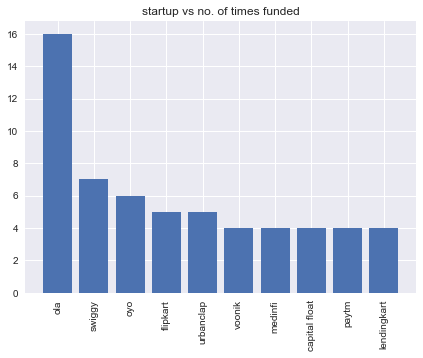

In [96]:
fig, ax = plt.subplots(figsize=(7, 5))
plt.bar(start.index,start.values)

plt.xticks(rotation='vertical')
plt.title('startup vs no. of times funded')
plt.show()


In [98]:
top10funded=df_final.groupby('StartupName')['AmountInUSD'].sum().sort_values(ascending=False).head(10)

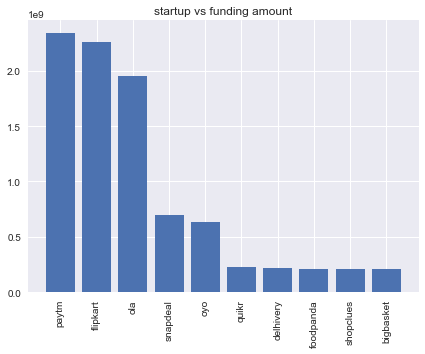

In [100]:
fig, ax = plt.subplots(figsize=(7, 5))
plt.bar(top10funded.index,top10funded.values)
plt.title('startup vs funding amount')
plt.xticks(rotation='vertical')
plt.show()

In [53]:
industry=df['IndustryVertical'].value_counts().head(10)

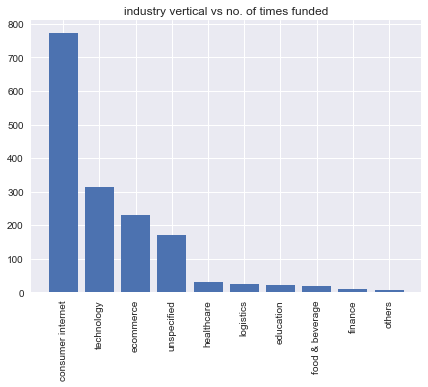

In [101]:
fig, ax = plt.subplots(figsize=(7, 5))
plt.bar(industry.index,industry.values)
plt.title('industry vertical vs no. of times funded')
plt.xticks(rotation='vertical')
plt.show()

In [104]:
industryfunded=df_final.groupby('IndustryVertical')['AmountInUSD'].sum().sort_values(ascending=False).head(10)

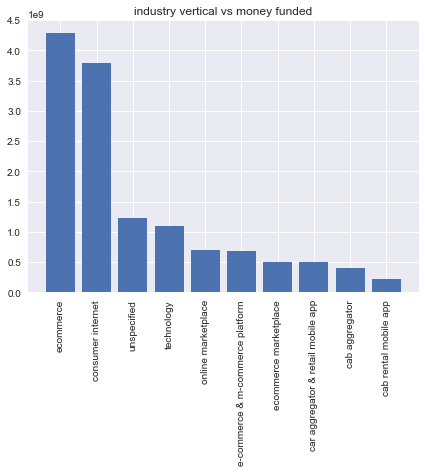

In [105]:
fig, ax = plt.subplots(figsize=(7, 5))
plt.bar(industryfunded.index,industryfunded.values)
plt.title('industry vertical vs money funded')
plt.xticks(rotation='vertical')
plt.show()

In [106]:
subv=df['SubVertical'].value_counts().head(10)

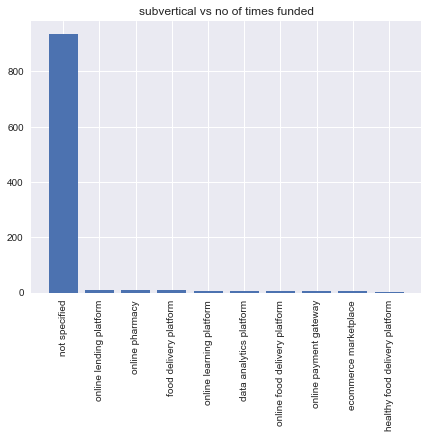

In [107]:
fig, ax = plt.subplots(figsize=(7, 5))
plt.bar(subv.index,subv.values)
plt.title('subvertical vs no of times funded')
plt.xticks(rotation='vertical')
plt.show()

In [57]:
subv.index

Index(['not specified', 'online lending platform', 'online pharmacy',
       'food delivery platform', 'online learning platform',
       'data analytics platform', 'online food delivery platform',
       'online payment gateway', 'ecommerce marketplace',
       'healthy food delivery platform'],
      dtype='object')

In [108]:
subverticalfunded=df_final.groupby('SubVertical')['AmountInUSD'].sum().sort_values(ascending=False).head(10)

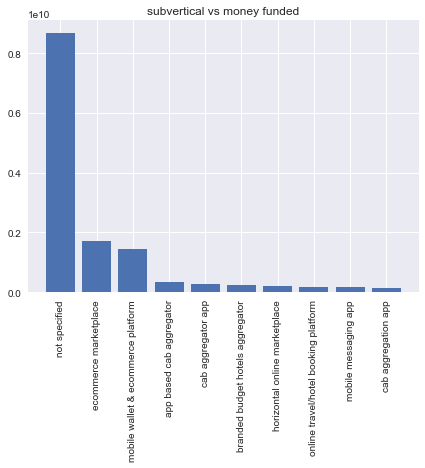

In [109]:
fig, ax = plt.subplots(figsize=(7, 5))
plt.bar(subverticalfunded.index,subverticalfunded.values)
plt.title('subvertical vs money funded')
plt.xticks(rotation='vertical')
plt.show()

In [58]:
city=df['CityLocation'].value_counts().head(10)

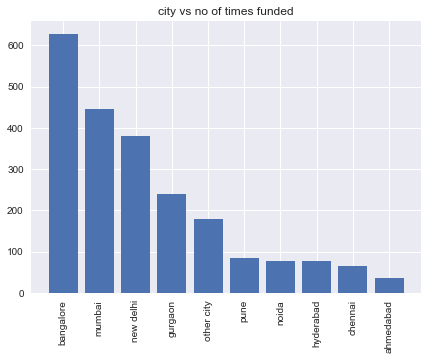

In [110]:
fig, ax = plt.subplots(figsize=(7, 5))
plt.bar(city.index,city.values)
plt.title('city vs no of times funded')
plt.xticks(rotation='vertical')
plt.show()

In [111]:
cityfunded=df_final.groupby('CityLocation')['AmountInUSD'].sum().sort_values(ascending=False).head(10)

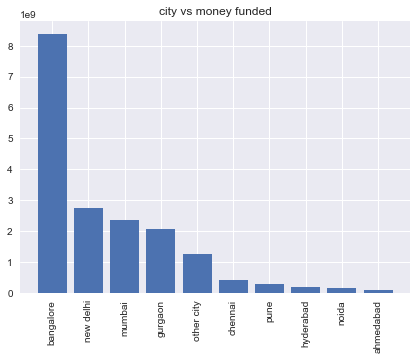

In [112]:
fig, ax = plt.subplots(figsize=(7, 5))
plt.bar(cityfunded.index,cityfunded.values)
plt.title('city vs money funded')
plt.xticks(rotation='vertical')
plt.show()

In [113]:
itype=df['InvestmentType'].value_counts().head(10)

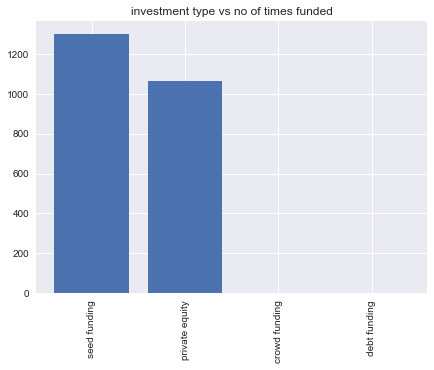

In [114]:
fig, ax = plt.subplots(figsize=(7, 5))
plt.bar(itype.index,itype.values)
plt.title('investment type vs no of times funded')
plt.xticks(rotation='vertical')
plt.show()

In [115]:
inamt=df_final.groupby('InvestmentType').sum()['AmountInUSD'].sort_values(ascending=False).head(10)

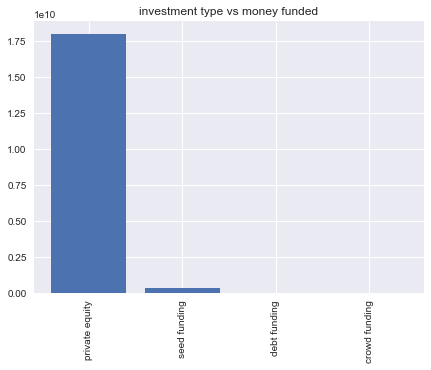

In [116]:
fig, ax = plt.subplots(figsize=(7, 5))
plt.bar(inamt.index,inamt.values)
plt.title('investment type vs money funded')
plt.xticks(rotation='vertical')
plt.show()

In [67]:
df_final

,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Date_day,Date_month,Date_year
0,touchkin,technology,predictive care platform,bangalore,kae capital,private equity,1300000.0,01,08,2017
3,zepo,consumer internet,diy ecommerce platform,mumbai,"kunal shah, letsventure, anupam mittal, hetal ...",seed funding,500000.0,02,08,2017
4,click2clinic,consumer internet,healthcare service aggregator,hyderabad,"narottam thudi, shireesh palle",seed funding,850000.0,02,08,2017
5,billion loans,consumer internet,peer to peer lending platform,bangalore,reliance corporate advisory services ltd,seed funding,1000000.0,01,07,2017
6,ecolibriumenergy,technology,energy management solutions provider,ahmedabad,"infuse ventures, jll",private equity,2600000.0,03,07,2017
7,droom,ecommerce,online marketplace for automobiles,gurgaon,"asset management (asia) ltd, digital garage inc",private equity,20000000.0,04,07,2017
8,jumbotail,ecommerce,online marketplace for food and grocery,bangalore,"kalaari capital, nexus india capital advisors",private equity,8500000.0,05,07,2017
9,moglix,ecommerce,b2b marketplace for industrial products,noida,"international finance corporation, rocketship,...",private equity,12000000.0,05,07,2017
10,timesaverz,consumer internet,hyperlocal home services provider,mumbai,bccl,private equity,1000000.0,05,07,2017
13,clip app,consumer internet,digital media video platform,bangalore,"india quotient, shunwei capital",seed funding,1000000.0,07,07,2017


In [97]:
pd.crosstab(df['StartupName'],columns=df['InvestmentType']).sort_values(by='private equity',ascending=False).head(10)

InvestmentType,crowd funding,debt funding,private equity,seed funding
StartupName,,,,
ola,0,0,15,5
swiggy,0,0,7,0
oyo,0,0,6,2
paytm,0,0,6,0
flipkart,0,0,5,0
byju’s,0,0,5,0
lenskart,0,0,5,0
urbanclap,0,0,5,1
capital float,0,0,4,0


In [86]:
best=df.groupby('StartupName').get_group('paytm')

In [90]:
best

,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Date_day,Date_month,Date_year
158,paytm,ecommerce,mobile wallet & ecommerce platform,bangalore,softbank group,private equity,1.400000e+09,18,05,2017
266,paytm,ecommerce,ecommerce marketplace,bangalore,alibaba,private equity,2.000000e+08,03,03,2017
821,paytm,ecommerce,mobile wallet & ecommerce platform,bangalore,mediatek inc.,private equity,6.000000e+07,30,8,2016
1787,paytm,e-commerce & m-commerce platform,not specified,new delhi,"alibaba group, ant financial",private equity,6.800000e+08,29,09,2015
2218,paytm,unspecified,not specified,other city,ratan tata,private equity,NaN,13,03,2015
2276,paytm,unspecified,not specified,other city,ant financial services (alipay),private equity,NaN,05,02,2015


In [91]:
top10funding=df_final.groupby('InvestorsName')['AmountInUSD'].sum().sort_values(ascending=False).head(10)

In [92]:
top10funding

InvestorsName
softbank group                                                                                                   1.467000e+09
microsoft, ebay, tencent holdings                                                                                1.400000e+09
steadview capital and existing investors                                                                         7.000000e+08
alibaba group, ant financial                                                                                     6.800000e+08
baillie gifford, falcon edge capital, tiger global, softbank group, dst global, didi kuaidi                      5.000000e+08
alibaba, foxconn, softbank                                                                                       5.000000e+08
dst global, steadview capital, tiger global, accel partners & others                                             4.000000e+08
softbank group corp                                                                                     

In [117]:
df2015=df_final.groupby('Date_year').get_group('2015')

In [120]:
fq2015=df2015.groupby('Date_month').get_group('01')['AmountInUSD'].sum()+df2015.groupby('Date_month').get_group('02')['AmountInUSD'].sum()+df2015.groupby('Date_month').get_group('03')['AmountInUSD'].sum()

In [122]:
sq2015=df2015.groupby('Date_month').get_group('04')['AmountInUSD'].sum()+df2015.groupby('Date_month').get_group('05')['AmountInUSD'].sum()+df2015.groupby('Date_month').get_group('06')['AmountInUSD'].sum()

In [123]:
tq2015=df2015.groupby('Date_month').get_group('07')['AmountInUSD'].sum()+df2015.groupby('Date_month').get_group('08')['AmountInUSD'].sum()+df2015.groupby('Date_month').get_group('09')['AmountInUSD'].sum()

In [124]:
lq2015=df2015.groupby('Date_month').get_group('10')['AmountInUSD'].sum()+df2015.groupby('Date_month').get_group('11')['AmountInUSD'].sum()+df2015.groupby('Date_month').get_group('12')['AmountInUSD'].sum()

In [125]:
df2015['AmountInUSD'].sum()

8673022368.0

In [126]:
fq2015+sq2015+tq2015+lq2015

7372741368.0

In [135]:
lst_col = 'InvestorsName'

In [136]:
x = df.assign(**{lst_col:df[lst_col].str.split(',')})

In [137]:
x

,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Date_day,Date_month,Date_year
0,touchkin,technology,predictive care platform,bangalore,[kae capital],private equity,1300000.0,01,08,2017
1,ethinos,technology,digital marketing agency,mumbai,[triton investment advisors],private equity,NaN,02,08,2017
2,leverage edu,consumer internet,online platform for higher education services,new delhi,"[kashyap deorah, anand sankeshwar, deepak ja...",seed funding,NaN,02,08,2017
3,zepo,consumer internet,diy ecommerce platform,mumbai,"[kunal shah, letsventure, anupam mittal, he...",seed funding,500000.0,02,08,2017
4,click2clinic,consumer internet,healthcare service aggregator,hyderabad,"[narottam thudi, shireesh palle]",seed funding,850000.0,02,08,2017
5,billion loans,consumer internet,peer to peer lending platform,bangalore,[reliance corporate advisory services ltd],seed funding,1000000.0,01,07,2017
6,ecolibriumenergy,technology,energy management solutions provider,ahmedabad,"[infuse ventures, jll]",private equity,2600000.0,03,07,2017
7,droom,ecommerce,online marketplace for automobiles,gurgaon,"[asset management (asia) ltd, digital garage ...",private equity,20000000.0,04,07,2017
8,jumbotail,ecommerce,online marketplace for food and grocery,bangalore,"[kalaari capital, nexus india capital advisors]",private equity,8500000.0,05,07,2017
9,moglix,ecommerce,b2b marketplace for industrial products,noida,"[international finance corporation, rocketshi...",private equity,12000000.0,05,07,2017


In [139]:
newdf=pd.DataFrame({col:np.repeat(x[col].values, x[lst_col].str.len()) for col in x.columns.difference([lst_col])}).assign(**{lst_col:np.concatenate(x[lst_col].values)})[x.columns.tolist()]

In [140]:
newdf.shape

(4577, 10)

In [141]:
newdf

,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Date_day,Date_month,Date_year
0,touchkin,technology,predictive care platform,bangalore,kae capital,private equity,1300000.0,01,08,2017
1,ethinos,technology,digital marketing agency,mumbai,triton investment advisors,private equity,NaN,02,08,2017
2,leverage edu,consumer internet,online platform for higher education services,new delhi,kashyap deorah,seed funding,NaN,02,08,2017
3,leverage edu,consumer internet,online platform for higher education services,new delhi,anand sankeshwar,seed funding,NaN,02,08,2017
4,leverage edu,consumer internet,online platform for higher education services,new delhi,deepak jain,seed funding,NaN,02,08,2017
5,leverage edu,consumer internet,online platform for higher education services,new delhi,sadashiva nt,seed funding,NaN,02,08,2017
6,leverage edu,consumer internet,online platform for higher education services,new delhi,arjun mehta,seed funding,NaN,02,08,2017
7,leverage edu,consumer internet,online platform for higher education services,new delhi,satish kaul,seed funding,NaN,02,08,2017
8,leverage edu,consumer internet,online platform for higher education services,new delhi,anindya ghose,seed funding,NaN,02,08,2017
9,zepo,consumer internet,diy ecommerce platform,mumbai,kunal shah,seed funding,500000.0,02,08,2017


In [151]:
iname=newdf['InvestorsName'].value_counts().head(10)

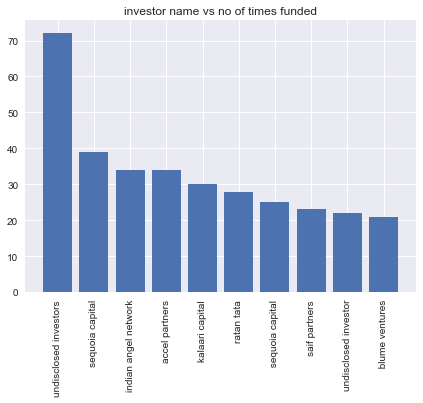

In [152]:
fig, ax = plt.subplots(figsize=(7, 5))
plt.bar(iname.index,iname.values)
plt.title('investor name vs no of times funded')
plt.xticks(rotation='vertical')
plt.show()

In [148]:
newdf = newdf[newdf.InvestorsName != '']

In [161]:
newdf

,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Date_day,Date_month,Date_year
0,touchkin,technology,predictive care platform,bangalore,kae capital,private equity,1300000.0,01,08,2017
1,ethinos,technology,digital marketing agency,mumbai,triton investment advisors,private equity,NaN,02,08,2017
2,leverage edu,consumer internet,online platform for higher education services,new delhi,kashyap deorah,seed funding,NaN,02,08,2017
3,leverage edu,consumer internet,online platform for higher education services,new delhi,anand sankeshwar,seed funding,NaN,02,08,2017
4,leverage edu,consumer internet,online platform for higher education services,new delhi,deepak jain,seed funding,NaN,02,08,2017
5,leverage edu,consumer internet,online platform for higher education services,new delhi,sadashiva nt,seed funding,NaN,02,08,2017
6,leverage edu,consumer internet,online platform for higher education services,new delhi,arjun mehta,seed funding,NaN,02,08,2017
7,leverage edu,consumer internet,online platform for higher education services,new delhi,satish kaul,seed funding,NaN,02,08,2017
8,leverage edu,consumer internet,online platform for higher education services,new delhi,anindya ghose,seed funding,NaN,02,08,2017
9,zepo,consumer internet,diy ecommerce platform,mumbai,kunal shah,seed funding,500000.0,02,08,2017


In [166]:
newdf.groupby(['CityLocation','InvestorsName','IndustryVertical']).count()

StartupName  \
CityLocation InvestorsName                                      IndustryVertical                                      
agra         indian angel network                               ecommerce                                         1   
             indian angels network                              ecommerce                                         1   
ahmedabad     akash bhavsar                                     consumer internet                                 1   
              amit jindal                                       consumer internet                                 1   
              ashvin chadha                                     online finance lending platform                   1   
              avnish mehra                                      consumer internet                                 1   
              brand capital                                     custom merchandize platform                       1   
              coleman and company ltd                           ecommerce                                         1   
                                                                technology                                        1   
              deepak chokhani                                   ecommerce                                         1   
              franchise india brands                            ecommerce                                         1   
              india quotient                                    consumer internet                                 1   
              jeevanandhan rajagopal                            consumer internet                                 1   
              jll                                               technology                                        1   
              mayfield                                          online finance lending platform                   1   
              mayfield india                                    consumer internet                                 1   
              miten mehta                                       consumer internet                                 1   
              mmy co-founder                                    logistics service platform                        1   
              nagendra chaudhary                                consumer internet                                 1   
              pavan bakeri                                      consumer internet                                 1   
              pranay adhvaryu                                   consumer internet                                 1   
              rakesh patel                                      consumer internet                                 1   
              ravi sampat                                       consumer internet                                 1   
              saama capital                                     consumer internet                                 1   
              shailesh mehta                                    online finance lending platform                   1   
              umasankar nistala                                 consumer internet                                 1   
              vc karthic                                        consumer internet                                 1   
              vikas chadha & others                             consumer internet                                 1   
              yogesh patel & others                             ecommerce                                         1   
              zaffiro ventures                                  technology                                        1   
...                                                                                                             ...   
udaipur      ennovent impact investment holding                 tech-enabled rural healthcare services            1   
udupi         kalaari capital                             

In [169]:
liq=['fq2015','sq2015','tq2015','lq2015','fq2016','sq2016','tq2016','lq2016','fq2017','sq2017','tq2017','lq2017']

In [173]:
li=[1227761368.0,1844179000.0,2840712000.0,1460089000.0,1014823000.0,412886000.0,684883000.0,684688000.0,2812473500.0,2863448000.0,2702040000.0,0]

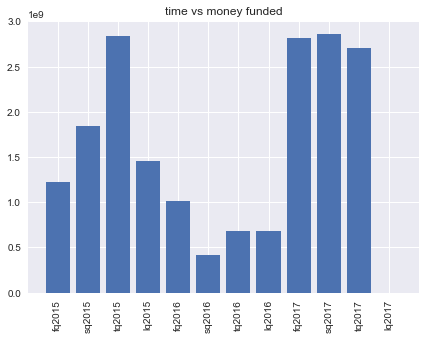

In [176]:
fig, ax = plt.subplots(figsize=(7, 5))
plt.bar(liq,li)
plt.title('time vs money funded')
plt.xticks(rotation='vertical')
plt.show()

In [177]:
df_final

,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Date_day,Date_month,Date_year
0,touchkin,technology,predictive care platform,bangalore,kae capital,private equity,1300000.0,01,08,2017
3,zepo,consumer internet,diy ecommerce platform,mumbai,"kunal shah, letsventure, anupam mittal, hetal ...",seed funding,500000.0,02,08,2017
4,click2clinic,consumer internet,healthcare service aggregator,hyderabad,"narottam thudi, shireesh palle",seed funding,850000.0,02,08,2017
5,billion loans,consumer internet,peer to peer lending platform,bangalore,reliance corporate advisory services ltd,seed funding,1000000.0,01,07,2017
6,ecolibriumenergy,technology,energy management solutions provider,ahmedabad,"infuse ventures, jll",private equity,2600000.0,03,07,2017
7,droom,ecommerce,online marketplace for automobiles,gurgaon,"asset management (asia) ltd, digital garage inc",private equity,20000000.0,04,07,2017
8,jumbotail,ecommerce,online marketplace for food and grocery,bangalore,"kalaari capital, nexus india capital advisors",private equity,8500000.0,05,07,2017
9,moglix,ecommerce,b2b marketplace for industrial products,noida,"international finance corporation, rocketship,...",private equity,12000000.0,05,07,2017
10,timesaverz,consumer internet,hyperlocal home services provider,mumbai,bccl,private equity,1000000.0,05,07,2017
13,clip app,consumer internet,digital media video platform,bangalore,"india quotient, shunwei capital",seed funding,1000000.0,07,07,2017


In [178]:
df_trial=df_final

In [179]:
df_trial["FundingBins"] = pd.DataFrame(pd.cut(df_final['AmountInUSD'], [0,100000,200000,300000,500000,1000000,5000000,10000000,100000000],
      labels=['0-100', '100-200', '200-300','300-500','500-1M',
              '1M-500M','5M-1Bi','1Bi-10Bi']))

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [181]:
df_trial.shape

(1525, 11)

In [182]:
df1 = pd.concat([df_trial, pd.get_dummies(df_trial['IndustryVertical'])], axis=1)
df1.drop(['IndustryVertical'],axis=1,inplace=True)

df2 = pd.concat([df1, pd.get_dummies(df1['SubVertical'])], axis=1)
df2.drop(['SubVertical'],axis=1,inplace=True)

df3 = pd.concat([df2, pd.get_dummies(df2['CityLocation'])], axis=1)
df3.drop(['CityLocation'],axis=1,inplace=True)

df4 = pd.concat([df3, pd.get_dummies(df3['InvestorsName'])], axis=1)
df4.drop(['InvestorsName'],axis=1,inplace=True)

df5 = pd.concat([df4, pd.get_dummies(df4['InvestmentType'])], axis=1)
df5.drop(['InvestmentType'],axis=1,inplace=True)

In [184]:
df5.shape

(1525, 2606)

In [185]:
df5.drop(['StartupName'],axis=1,inplace=True)

In [186]:
df5.drop(['AmountInUSD'],axis=1,inplace=True)
df5["Date_day"] = df5["Date_day"].astype(np.int)
df5["Date_month"] = df5["Date_month"].astype(np.int)
df5["Date_year"] = df5["Date_year"].astype(np.int)

In [187]:
df5

,Date_day,Date_month,Date_year,FundingBins,3d printer manufacturer,advertising & marketing community networking platform,affordable education,affordable hotel booking online,alternate mobile monetization platform,api workflow platform,...,"zodius capital, lightspeed venture partners","zodius capital, ru-net, kalaari capital, qualcomm ventures",zodius technology fund,"zodius technology fund, khazanah nasional berhad","zodius technology fund, lightspeed venture partners","zodius technology opportunities fund, matrix partners",crowd funding,debt funding,private equity,seed funding
0,1,8,2017,1M-500M,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,2,8,2017,300-500,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,2,8,2017,500-1M,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,1,7,2017,500-1M,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,3,7,2017,1M-500M,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
7,4,7,2017,1Bi-10Bi,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8,5,7,2017,5M-1Bi,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9,5,7,2017,1Bi-10Bi,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
10,5,7,2017,500-1M,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
13,7,7,2017,500-1M,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [188]:
df5.dtypes

Date_day                                                                                                   int64
Date_month                                                                                                 int64
Date_year                                                                                                  int64
FundingBins                                                                                               object
3d printer manufacturer                                                                                    uint8
advertising & marketing community networking platform                                                      uint8
affordable education                                                                                       uint8
affordable hotel booking online                                                                            uint8
alternate mobile monetization platform                                                          

In [202]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, roc_auc_score, make_scorer

In [203]:
X = df5.drop('FundingBins',axis=1)
y = df5.iloc[:,3].astype(np.str)
np.random.seed(9)
            
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.1)

In [204]:
clf_1 = RandomForestClassifier()
clf_1.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [205]:
y_clf_1 = clf_1.predict(X_test)

In [207]:
accuracy_clf_1 = accuracy_score(y_test, y_clf_1)


In [208]:
accuracy_clf_1

0.30718954248366015

In [209]:
from sklearn.preprocessing import LabelEncoder

In [210]:
le = LabelEncoder()

In [213]:
df_final

,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Date_day,Date_month,Date_year,FundingBins
0,touchkin,technology,predictive care platform,bangalore,kae capital,private equity,1300000.0,01,08,2017,1M-500M
3,zepo,consumer internet,diy ecommerce platform,mumbai,"kunal shah, letsventure, anupam mittal, hetal ...",seed funding,500000.0,02,08,2017,300-500
4,click2clinic,consumer internet,healthcare service aggregator,hyderabad,"narottam thudi, shireesh palle",seed funding,850000.0,02,08,2017,500-1M
5,billion loans,consumer internet,peer to peer lending platform,bangalore,reliance corporate advisory services ltd,seed funding,1000000.0,01,07,2017,500-1M
6,ecolibriumenergy,technology,energy management solutions provider,ahmedabad,"infuse ventures, jll",private equity,2600000.0,03,07,2017,1M-500M
7,droom,ecommerce,online marketplace for automobiles,gurgaon,"asset management (asia) ltd, digital garage inc",private equity,20000000.0,04,07,2017,1Bi-10Bi
8,jumbotail,ecommerce,online marketplace for food and grocery,bangalore,"kalaari capital, nexus india capital advisors",private equity,8500000.0,05,07,2017,5M-1Bi
9,moglix,ecommerce,b2b marketplace for industrial products,noida,"international finance corporation, rocketship,...",private equity,12000000.0,05,07,2017,1Bi-10Bi
10,timesaverz,consumer internet,hyperlocal home services provider,mumbai,bccl,private equity,1000000.0,05,07,2017,500-1M
13,clip app,consumer internet,digital media video platform,bangalore,"india quotient, shunwei capital",seed funding,1000000.0,07,07,2017,500-1M


In [214]:
X=df_final.iloc[:,:-1]

In [215]:
X

,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Date_day,Date_month,Date_year
0,touchkin,technology,predictive care platform,bangalore,kae capital,private equity,1300000.0,01,08,2017
3,zepo,consumer internet,diy ecommerce platform,mumbai,"kunal shah, letsventure, anupam mittal, hetal ...",seed funding,500000.0,02,08,2017
4,click2clinic,consumer internet,healthcare service aggregator,hyderabad,"narottam thudi, shireesh palle",seed funding,850000.0,02,08,2017
5,billion loans,consumer internet,peer to peer lending platform,bangalore,reliance corporate advisory services ltd,seed funding,1000000.0,01,07,2017
6,ecolibriumenergy,technology,energy management solutions provider,ahmedabad,"infuse ventures, jll",private equity,2600000.0,03,07,2017
7,droom,ecommerce,online marketplace for automobiles,gurgaon,"asset management (asia) ltd, digital garage inc",private equity,20000000.0,04,07,2017
8,jumbotail,ecommerce,online marketplace for food and grocery,bangalore,"kalaari capital, nexus india capital advisors",private equity,8500000.0,05,07,2017
9,moglix,ecommerce,b2b marketplace for industrial products,noida,"international finance corporation, rocketship,...",private equity,12000000.0,05,07,2017
10,timesaverz,consumer internet,hyperlocal home services provider,mumbai,bccl,private equity,1000000.0,05,07,2017
13,clip app,consumer internet,digital media video platform,bangalore,"india quotient, shunwei capital",seed funding,1000000.0,07,07,2017


In [216]:
y=df_final.iloc[:,-1].astype(np.str)

In [226]:
X_encoded = X.apply(le.fit_transform)
X_encoded.drop('AmountInUSD',axis=1,inplace=True)

In [227]:
X_encoded.dtypes

StartupName         int64
IndustryVertical    int64
SubVertical         int64
CityLocation        int64
InvestorsName       int64
InvestmentType      int64
Date_day            int64
Date_month          int64
Date_year           int64
dtype: object

In [219]:
y.dtypes

dtype('O')

In [305]:
np.random.seed(9)
            
X_train,X_test,y_train,y_test = train_test_split(X_encoded,y,test_size = 0.1)

In [306]:
clf_1 = RandomForestClassifier()
clf_1.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [307]:
y_clf_1 = clf_1.predict(X_test)

In [308]:
accuracy_clf_1 = accuracy_score(y_test, y_clf_1)

In [309]:
accuracy_clf_1

0.30718954248366015

In [310]:
# Defined a function for implementing hyper parameter tuning
def gridfunc(classifier, parameter, X_train, y_train):
        
    clf = classifier
    np.random.seed(9)
    parameters = parameter
    acc_scorer = make_scorer(accuracy_score)
    
    # Run the grid search
    grid_obj = GridSearchCV(clf, parameters, scoring=acc_scorer)
    grid_obj = grid_obj.fit(X_train, y_train)
    
    return grid_obj

In [311]:
grid=gridfunc(clf_1, {'n_estimators': [44],
             'max_features':['sqrt'],
             'criterion': ['gini'],
             'max_depth': [49]
            } , X_train, y_train)

In [312]:
clf = grid.best_estimator_

In [313]:
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=49, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=44, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [314]:
# predicting for min_samples 0f leaf as 2.
y_clf_1 = clf.predict(X_test)
#calculate accuracy and roc auc score for min leaf samples
accuracy_clf_1 = accuracy_score(y_test, y_clf_1)
print("Accuracy score of the model with min sample leaf 2 is: {}".format(accuracy_clf_1))

Accuracy score of the model with min sample leaf 2 is: 0.29411764705882354
